## Captial One DSC
Zisheng Jason Chang
Submission Version (v20.01) 

ZJC Candidate ID: ( C1540358 )

Data Science Challenge: Card Transactions!

This coding and analysis challenge is designed to test your skill and intuition analyzing real[-ish] world data. For the challenge, we will use credit card transactions data. Note that this dataset loosely resembles real transactional data from Capital One credit card customers, but the entities and relations within are purely fictional. No persons, places, or things lost their identity in the making of this dataset.
Required Questions: Please answer completely all four required questions.

## Question 1: Load
**1(a) Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here**


I'll be using the package pandas to read the dataset. Due to the size of the line delimited JSON File I'll read the first 50,000 lines.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import imp
jsonReader = pd.read_json('transactions.txt',lines=True,chunksize=50000)
df = next(jsonReader)

For each line there are a total of 29 features. I've converted transaciton date time into a column date time.

In [2]:
df['transactionDateTime'] = pd.to_datetime(df.transactionDateTime)
df.iloc[0]

accountNumber                         737265056
customerId                            737265056
creditLimit                                5000
availableMoney                             5000
transactionDateTime         2016-08-13 14:27:32
transactionAmount                         98.55
merchantName                               Uber
acqCountry                                   US
merchantCountryCode                          US
posEntryMode                                 02
posConditionCode                             01
merchantCategoryCode                  rideshare
currentExpDate                          06/2023
accountOpenDate                      2015-03-14
dateOfLastAddressChange              2015-03-14
cardCVV                                     414
enteredCVV                                  414
cardLast4Digits                            1803
transactionType                        PURCHASE
echoBuffer                                     
currentBalance                          

**1(b) Please describe the structure of the data. Number of records and fields in each record?**

After reading the dataset the structure of the JSON lines are shown below. The only numeric(floats and ints) columns are accountNumber, customerId, creditLimit, availableMoney,transactionAmount, enteredCVV, cardLast4Digits, currentBalance. All other columns are stored as objects and booleans

In [3]:
df.dtypes

accountNumber                        int64
customerId                           int64
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate                      object
accountOpenDate                     object
dateOfLastAddressChange             object
cardCVV                              int64
enteredCVV                           int64
cardLast4Digits                      int64
transactionType                     object
echoBuffer                          object
currentBalance                     float64
merchantCity                        object
merchantState                       object
merchantZip

**1(c) Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.**

Below are the statistics across the entire dataset. for each of the numeric columns their minimum, maximum are shown below

In [4]:
described = df.describe()
described

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.355273e+08,5.355273e+08,9708.655000,5849.056806,137.208715,496.126380,496.017860,4384.211720,3859.598194
std,2.433660e+08,2.433660e+08,10611.480171,8850.203442,148.040037,275.432567,275.386515,2614.410113,5401.595431
min,1.013807e+08,1.013807e+08,250.000000,-793.620000,0.000000,101.000000,3.000000,0.000000,0.000000
25%,3.825957e+08,3.825957e+08,5000.000000,981.140000,33.800000,221.000000,221.000000,2701.000000,493.882500
50%,4.489626e+08,4.489626e+08,5000.000000,2852.690000,87.355000,494.000000,494.000000,3624.000000,2166.975000
75%,7.452174e+08,7.452174e+08,15000.000000,7005.870000,191.432500,723.000000,723.000000,6317.000000,4638.300000
max,9.963628e+08,9.963628e+08,50000.000000,50000.000000,1434.500000,995.000000,998.000000,9945.000000,47489.500000


For the boolean columns I've included a count of their types below. 

In [5]:
types = df.dtypes
for colStr,obj in (types.iteritems()):
    if (obj==bool):
        print("=== {} object value counts: ===".format(colStr))
        print(df[colStr].value_counts())

=== cardPresent object value counts: ===
False    27753
True     22247
Name: cardPresent, dtype: int64
=== expirationDateKeyInMatch object value counts: ===
False    49948
True        52
Name: expirationDateKeyInMatch, dtype: int64
=== isFraud object value counts: ===
False    49317
True       683
Name: isFraud, dtype: int64


For the category columns there are missing values in all of them except for merchant category code. For the merchant category code, there are no missing values

In [6]:
colsMask = ['acqCountry','merchantCountryCode','posEntryMode',
           'posEntryMode','posConditionCode','merchantCategoryCode',
           'transactionType','merchantCity','merchantState']
types = df[colsMask].dtypes
for colStr,obj in (types.iteritems()):
    if (obj==bool or obj=='object'):
        print("=== {} object value counts: ===".format(colStr))
        print(df[colStr].value_counts())
        print("")

=== acqCountry object value counts: ===
US     49259
         264
MEX      208
CAN      156
PR       113
Name: acqCountry, dtype: int64

=== merchantCountryCode object value counts: ===
US     49472
MEX      211
CAN      158
PR       114
          45
Name: merchantCountryCode, dtype: int64

=== posEntryMode object value counts: ===
05    20001
09    15133
02    12288
90     1234
80     1062
        282
Name: posEntryMode, dtype: int64

=== posEntryMode object value counts: ===
05    20001
09    15133
02    12288
90     1234
80     1062
        282
Name: posEntryMode, dtype: int64

=== posConditionCode object value counts: ===
01    39972
08     9533
99      465
         30
Name: posConditionCode, dtype: int64

=== merchantCategoryCode object value counts: ===
online_retail           14259
fastfood                 6938
food                     5529
entertainment            5117
rideshare                4150
online_gifts             3369
fuel                     1767
auto                

## Question 2: Plot
**2a. Plot a histogram of the processed amounts of each transaction, the transactionAmount column.**

**2b. Report any structure you find and any hypotheses you have about that structure.**

Below is a histogram of transaction amounts with the density turned on, normalizing the values.

A structure I observed is that fradulent transactions appear to have a peak at around 90 to 100 USD that resembles almost a poisson distribution, while normal transactions distribution are exponentially declining from x = 0

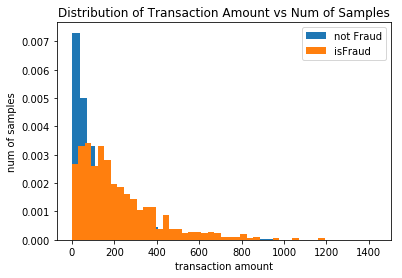

In [7]:
plt.hist(df[df.isFraud==False].transactionAmount,bins=39,label='not Fraud',density=True)
plt.hist(df[df.isFraud==True].transactionAmount,bins=39,label='isFraud',density=True)
plt.title("Distribution of Transaction Amount vs Num of Samples")
plt.ylabel("num of samples")
plt.xlabel("transaction amount")
plt.legend()
plt.show()

I was then curious what the transactions were like based on time of day, to see if there were any patterns in time based on when customers were making transactions. Based on the histogram I did not make any observations on customer transactions based on time of day

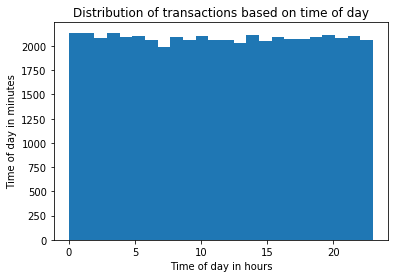

In [8]:
plt.hist(df.transactionDateTime.dt.hour,bins=24)
plt.title("Distribution of transactions based on time of day")
plt.xlabel("Time of day in hours")
plt.ylabel("Time of day in minutes")
plt.show()

After observing that there were no missing values in merchant category code, I was then curious what the most common transactions were, and what the next N most common were. The most common transactions are online retail, fast food, and food. I'll be looking to encode these variables in my models.

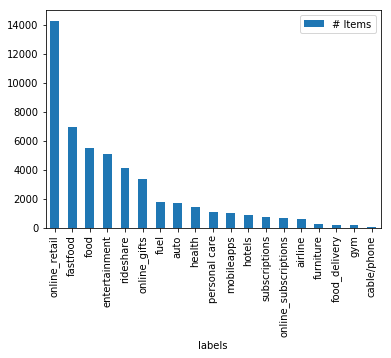

In [9]:
def plotCategory(colStr):
    labels, vals = [],[]
    for row in df[colStr].value_counts().iteritems():
        labels.append(row[0])
        vals.append(row[1])
    dfBar = pd.DataFrame({'labels':labels, '# Items':vals})
    ax = dfBar.plot.bar(x='labels', y='# Items', rot=90)
plotCategory('merchantCategoryCode')

Next of interest was the transaction type. The most common transactions were purchases, with some reversals and address verifications, and finally missing values.

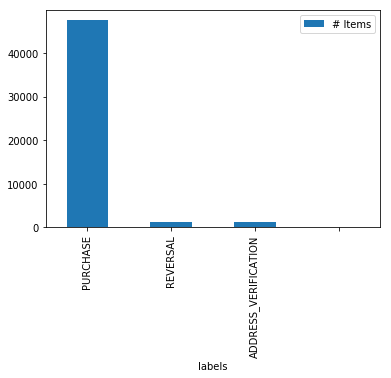

In [10]:
plotCategory('transactionType')

The number of transactions made by country were dominantly made in the United States.

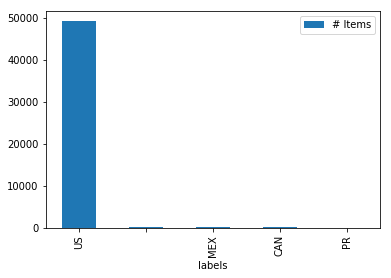

In [11]:
plotCategory('acqCountry')

In the dataset subselected, there are a total of 367 accounts, each on average having 136 transactions.

In [12]:
accts, counts = np.unique(df['accountNumber'],return_counts=True)
print("number of accounts {}".format(len(accts)))
print("number of tx by acct {}".format(np.mean(counts)))

number of accounts 367
number of tx by acct 136.23978201634878


## Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

**3a. Can you programmatically identify reversed and multi-swipe transactions?**

**DISCLAIMER: Unfortunately due to time constraints, I was unable to finish my analysis of reversed and multiswip transactions. Below is how I would've approached the problem, and the remainder of my time was spent on modeling.**



There are four different types of transaction types:
address verification, purchase, and reversal. 

In my script I've programtically detected multi-swipe transactions by first identifying a single user. These methods can be located in the python file `scripts/utils.py`

After identifying the user, I then iterate through their interactions with merchants. For each transaction with merchants I first subselect transactions that have the same merchant name, and transaction amount.

After flagging this I look at the time difference between them. Sometimes, these same transaction amounts and merchant names can be identified as subscription transactions. For now. I simply set the difference between transactions to 2 minutes. If there are two transactions from the same merchant for the same dollar amount 2 minutes, it is flagged as a multi-swipe

Reversed transactions I identified by simply setting a mask and determining if a transaction type was a reversal, matching that transaction amount to another transaction.

In [13]:
import scripts.utils as utils
imp.reload(utils)

tempdf = df.head(10000)

# First start with one account, look at account with highest number of txs
accts, counts = np.unique(df['accountNumber'],return_counts=True)

# Subselect the account with highest activity, and sort by transaction
acctIdMostTransactions = accts[np.argmax(counts)]

accountTx = tempdf[tempdf.accountNumber==acctIdMostTransactions]
results = utils.predictDuplicateByUser(tempdf,accountTx)

**3b. What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)**

**3c. Did you find anything interesting about either kind of transaction?**

## Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

**4a. Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).**


### Introduction
For the predictive model, I've decided to use only the first 50,000 transactions due to time constraints.

In the first part of modeling I first show some key insights about the dataset and variable transformations I performed.

I then train two models: a baseline model and a CNN model with features extracted from the dataset.

After training the models. I run the models on a test dataset it has never seen before, and evaluate the precision and accuracy of the models.

To summarize, I was able to successfully develop a model that can predcit better than chance if a transaction is fradulent.

### Unbalanced Dataset
The first issue to address is the unbalanced number of labels. This will result in any accuracy metric being dominated by non fradulent cases. In this dataset, only 1% of the dataset consists of fradulent transactions. In my next steps I preprocess the dataset by oversampling fradulent transactions.

In [15]:
df.isFraud.value_counts()

False    49317
True       683
Name: isFraud, dtype: int64

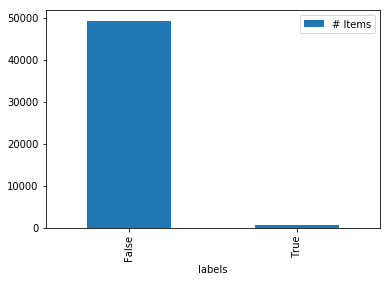

In [16]:
plotCategory('isFraud')

In order to resolve this issue, I have oversampled the number of fradulent cases AFTER splitting the data set into train and test. The results of this balancing are shown below


In [18]:
import torch
import scripts.Dataset as dataset
from sklearn.model_selection import train_test_split

"""
Data preloading
"""
import scripts.utils as utils
imp.reload(utils)

# this iterates through each
allUserTxsDf = utils.calculateUser(df)
allUserTxsDf = utils.encodeColumn(allUserTxsDf)
allUserTxsDf = utils.encodeColumn(allUserTxsDf,col='merchantCategoryCode')

# Create unbalanced test and train set
train_df_un,test_df_un = train_test_split(allUserTxsDf,test_size=0.25, 
                                          random_state=10)
# Create train and test dataframes
train_df = utils.upsampleMinority(train_df_un)
test_df = utils.upsampleMinority(test_df_un)

trainDataset = dataset.DfDataset(train_df)
testDataset = dataset.DfDataset(test_df)

train_dataset_loader = torch.utils.data.DataLoader(dataset=trainDataset,
                                             batch_size=1,
                                             shuffle=False)
test_dataset_loader = torch.utils.data.DataLoader(dataset=testDataset,
                                             batch_size=1,
                                             shuffle=False)



Below are printed out distributions of the train and test before and after balancing

In [19]:
imp.reload(dataset)
print("=== Training set before balancing ===")
print(train_df_un.isFraud.value_counts())
print("=== Training set after balancing ===")
print(train_df.isFraud.value_counts())
print(" ")
print("=== Testing set before balancing ===")
print(test_df_un.isFraud.value_counts())
print("=== Testing set after balancing ===")
print(test_df.isFraud.value_counts())

=== Training set before balancing ===
False    36983
True       517
Name: isFraud, dtype: int64
=== Training set after balancing ===
True     36983
False    36983
Name: isFraud, dtype: int64
 
=== Testing set before balancing ===
False    12334
True       166
Name: isFraud, dtype: int64
=== Testing set after balancing ===
True     12334
False    12334
Name: isFraud, dtype: int64



**Extracted features:**

In regards to the dataset I've also added two features ot the dataset.
For each user I've created the following features:
- the time difference between transactions by hour
- the mean amount, std dev, and median they spend for a time of day(0-9 AM, 9AM-1PM, 1PM-5PM, 5PM-12AM)
- a one hot encoded variable representing what time of day the transaction was made
- a one hot encoded representation of merchant Category Code

Then transaction amounts are normalized by user rowwise in order to bound the values between 0 and 1. Below is what a training row looks like. The transaction date time is not passed to the model.

In [20]:
allUserTxsDf.iloc[0]

transactionAmount                                       0.794772
transactionDateTime                          2016-08-13 14:27:32
isFraud                                                    False
hourDelta                                                      0
transactionAmountMedian                                 0.794772
transactionAmountMean                                   0.794772
transactionAmountStd                                           0
0_encodedTime                                                  1
1_encodedTime                                                  0
2_encodedTime                                                  0
3_encodedTime                                                  0
6_encodedTime                                                  0
airline_merchantCategoryCode                                   1
auto_merchantCategoryCode                                      0
cable/phone_merchantCategoryCode                               0
entertainment_merchantCat

## Training the model
In this section I train two models: a CNN and logistic regression model. The logistic regression model is implemented using sklearn, and the CNN is implemented using pytorch.

The logisiic regression model serves as a baseline for my CNN model to outpreform

### Logsitic Regression baseline model
Below is a baseline logistic regression model. One thing to observe is that the logistic regression model has performed better than chance, indicating that our engineered features are working

In [22]:
from sklearn.metrics import precision_recall_curve,auc,\
    confusion_matrix,precision_score,accuracy_score, roc_curve
cols = ['transactionAmount', 'hourDelta',
         'transactionAmountMedian', 'transactionAmountMean',
         'transactionAmountStd', '0_encodedTime', '1_encodedTime',
         '2_encodedTime', '3_encodedTime', '6_encodedTime',
         'auto_merchantCategoryCode', 'entertainment_merchantCategoryCode',
         'fastfood_merchantCategoryCode', 'food_merchantCategoryCode',
         'food_delivery_merchantCategoryCode', 'fuel_merchantCategoryCode',
         'gym_merchantCategoryCode', 'health_merchantCategoryCode',
         'mobileapps_merchantCategoryCode', 'online_retail_merchantCategoryCode',
         'personal care_merchantCategoryCode', 'rideshare_merchantCategoryCode']
trainX = train_df[cols]
trainy = train_df['isFraud']

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(trainX, trainy)
yHat = clf.predict(trainX)
yHatProba = clf.predict_proba(trainX)
print("Baseline logistic regression accuracy on training set: {}".format(clf.score(trainX, trainy)))

testX = test_df[cols]
testy = test_df['isFraud']
logreg_yHat = clf.predict(testX)
logreg_yHatProba = clf.predict_proba(testX)

lrprecision, lrrecall,_ = precision_recall_curve(testy, logreg_yHatProba[:,1])
lrfpr,lrtpr, _ = roc_curve(testy, logreg_yHatProba[:,1])
print("Baseline logistic regression Accuracy on testing set: {}".format(clf.score(testX,
                                                      testy)))

Baseline logistic regression accuracy on training set: 0.5940026498661547
Baseline logistic regression Accuracy on testing set: 0.6152505269985407


### CNN Model

My CNN model implements four layers,
- convolutional layer outputting 32 channels and kernel size of 4x4 with relu activation
- convolutional layer outputting 64 channels and kernel size of 2x2 with relu activation
- fully connected layer from 64 to 128 with relu activation
- fully connected layer from 128 to 1 with sigmoid activation

The specifics of this model can be found in `scripts/models.py` with the pytorch dataloader saved in `scripts/datasets.py`

The motivation for using a CNN on a non spatially import dataset is inspired from Chouiekh and Haj's paper ["ConvNets for Fraud Detection analysis"](https://www.sciencedirect.com/science/article/pii/S1877050918301182). 

Replicating the methods from this paper, each transaction is turned into a "synthetic image" representing inforamtion about the user. The CNN is then used to capture high dimensional feature spaces representing a fradulent transaction.

In [23]:
import scripts.models as m
import torch
import numpy as np
import torch.nn.functional as F
torch.manual_seed(0)
np.random.seed(0)
imp.reload(m)
cnnModel = m.Net()
optimizer = torch.optim.Adam(cnnModel.parameters(), lr=0.00001)
costs = []
for epoch in range(1):
    for i, (data, labels) in enumerate(train_dataset_loader):
        optimizer.zero_grad()
        output = cnnModel(data)
        loss = F.binary_cross_entropy(output, labels)
        loss.backward()
        optimizer.step()
        if(i%10000 == 0): print("i {}: {}".format(i,loss))
        costs.append(loss.item())
        pass
    pass

i 0: 0.6884455680847168
i 10000: 0.0007933544111438096
i 20000: 2.0861648408754263e-06
i 30000: 0.0
i 40000: 3.449523687362671
i 50000: 0.003022166434675455
i 60000: 8.821526535029989e-06
i 70000: 0.0


**4b. Provide an estimate of performance using an appropriate sample, and show your work.**


For evaluating the performance of the model I've decided to use precision recall, ROC curve, accuracy, and precision to determine the peformance of my model.

Below are figures of the accuracy, PR cruves, ROC curve, and AUC.

In [24]:
result = []
yHats =[]
gts = []

for i, (data, labels) in enumerate(test_dataset_loader):
    #data,labels = data.cuda(),labels.cuda()
    optimizer.zero_grad()
    output = cnnModel(data)
    yHats.append(output[0].detach())
    gts.append(labels[0].detach())    
    loss = F.binary_cross_entropy(output, labels)
    loss.backward()
    optimizer.step()
    result.append(loss.item())

print("mean cross entropy on test dataset: {}".format(np.mean(result)))

mean cross entropy on test dataset: 2.7041145929583066


**Models analysis and comparisons**

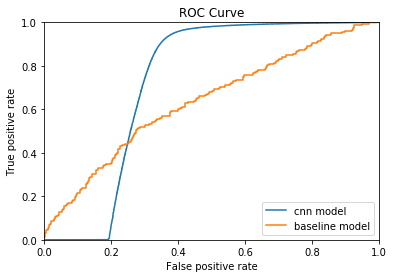

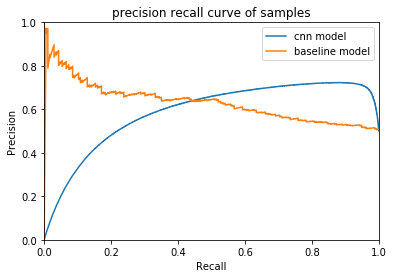

In [25]:
yHats = (np.array(yHats))
gts = (np.array(gts))
precision, recall, thresholds = precision_recall_curve(gts, yHats)
fpr,tpr, _ = roc_curve(gts, yHats)


plt.plot(fpr,tpr,label='cnn model')
plt.plot(lrfpr,lrtpr,label='baseline model')
plt.title("ROC Curve")
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

plt.plot(recall,precision,label='cnn model')
plt.plot(lrrecall,lrprecision,label='baseline model')
plt.title("precision recall curve of samples")
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend()
plt.show()

**CNN Model Performance**

In [26]:
print("Confusion Matrix:")
print(confusion_matrix(gts,yHats>0.5))
print("auc: {}".format(auc(fpr,tpr)))
print("acc : {}".format(accuracy_score(gts,yHats>0.5)))
print("prec: {}".format(precision_score(gts,yHats>0.5)))

Confusion Matrix:
[[ 7587  4747]
 [  634 11700]]
auc: 0.7260995733080732
acc : 0.7818631425328361
prec: 0.71137593482094


**Baseline Model Performance**

In [27]:
#precision_score(logreg_yHat,testy)
print("Confusion Matrix:")
print(confusion_matrix(gts,logreg_yHat>0.5))
print("acc : {}".format(accuracy_score(gts,logreg_yHat>0.5)))
print("prec: {}".format(precision_score(gts,logreg_yHat>0.5)))

Confusion Matrix:
[[8827 3507]
 [5984 6350]]
acc : 0.6152505269985407
prec: 0.644212234959927



From these results the CNN model was able to perform the baseline model, and demonstrates the predictive capability of a CNN model in determining if a transaction is fradulent. 

With the baseline model only achieving 61% accuracy, and this model achieving 72.3%, precision is also performed from the baseline model with the baseline only achieving 64.4% and the CNN achieving 71.1%.



**4c. Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)**


**Main algorithm**

The main motivation for using a convolutional neural network was to see if a kernel would be able to identify any relationship between the amount a person spends during the time of day, and compare that to the amount they have spent.

The motivation behind htis was Based on Chouiekh and Haj's paper ["ConvNets for Fraud Detection analysis"](https://www.sciencedirect.com/science/article/pii/S1877050918301182), who encoded customer data into a artificial image. While here they used records from their mobile communications, it inspired me to take advantage of the information based on when and where customers made transactions.

The CNN model is four layers in total: two layer convolutional network, with two fully connected layers to output one variable.


I wanted to spend as little time feature engineering, so while this data may not be spatially valuable, a CNN would be able to capture higher dimension spaces that are useful to detect fradulent transactions.

All of my scripts, methods, and pytorch models can be found inside my `scripts/` directory.


**Method**

The first step in my data process was to balance the dataset, and then encode the new features: how much a customer spends during time of day by mean, std dev, and median, what time of the day they spent their money, which category they spent it in, and how much time elapsed since their last transaction.

These features were then transformed into a ariticial 5x5 image with each 'pixel' representing a feature of the customer.

I then trained a logistic regression model on these encoded features as a baseline to compare against my CNN model.

I found that the features most useful to describe a customers profile was their transaction amount, where they spent their money, and the times in which they made these transactions.

After this I oversampled fradulent data, in order to balance the dataset and be able to determine the performance of the model without one class dominating another.

The model was only run on one epoch across the entire training and test dataset.

Then the model was evaluated on a test dataset which it has never seen before, and I observed that the model was able to classify fradulent transactions.



**Questions**

Questions I have are specifically what the POS codes mean for the dataset, and what specific variables mean. I'm also curious how these fradulent transactions determined, the motivation being to determine if there were any transactions which are actually fradulent, which weren't marked as in this dataset.

Next I'd want to know what the costs are associated with a false positive or a false negative, in order to be able to determine the best thresholds for the model to perform. For example, does it cost capital one more to falsely classify a transaction as fradulent? or does it cost more for capital one to falsely classify a transaction as non fradulent?

With more time I would've implemented a model that would train across the entire dataset, and also implement kfold training in order to make sure my model is not overfitting or suffering from any bias variance trade off.

**Conclusion**

In conclusion, I found that a CNN model with engineered features based on their spending habits was able to determine fradulent accounts with a average precision of 71% and accuracy of 72.3%. 

Next steps would be to impelment a Kfold training scheme to determine the performance of the model across the dataset, and tuning parameters to determine if there are any improvements.

Moving forward I'd like to learn more about how these fradulent transacftions were aggregated, and the context behind these transactions, specifically so I can work with Captial One to determine the best thresholds for this model(does it cost more to have a false positive or false negative?)


Thank you for your time and I look forward to hearing back.